### Imports


In [272]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget

import sys  # update paths
import os  # import os in order to find relative path
import numpy as np 
import matplotlib.pyplot as plt
import copy

sys.path.append('../../scresonators')
sys.path.append('../../meas_analysis')
sys.path.append('../../')

base_pth = '../../../Images/Resonators/'

import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

import ana_resonator as ana_res
import ana_tls

pth_base = '../../../../JJ_fab/Coherence Sample /Resonators Measurement/240719/data/'

sample ='no hf'
params={}
params['temp'] = 0.04

if sample=='no hf':
    params['atten'] = -50 
    params['min_power'] = -110
    params['max_power'] = -15
    params['pitch'] = [10, 12, 14, 16, 2, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 6.7, 7, 7.2, 7.5, 7.9]
    params['res_name'] = '240725'
elif sample=='hf':
    params['atten'] = -40 
    params['min_power'] = -85
    params['max_power'] = -25
    params['pitch'] = [10, 12, 14, 2, 16, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]
    params['res_name'] = '240719'
elif sample=='hf2':
    params['min_power'] = -100
    params['max_power'] = -30
    params['pitch'] = [10, 12, 14, 2, 16, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]
    params['res_name'] = '240729'
    params['atten'] = -50
else:
    params['min_power'] = -100
    params['max_power'] = -30
    params['pitch'] = [10, 12, 14, 2, 16, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]
    params['res_name'] = '240729-2'
    params['atten'] = -50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sweep power/temp, plot results

### Run sweep 

Counter({5825968: 21, 7083853: 21, 6142839: 21, 7462016: 21, 7793014: 21, 6729208: 21, 6734488: 21, 6429811: 21})
0
Counter({5825968: 21, 7083853: 21, 6142839: 21, 7462016: 21, 7793014: 21, 6729208: 21, 6734488: 21, 6429811: 21})
['res_5825968_120dbm_wide', 'res_5825968_115dbm_wide', 'res_5825968_110dbm_wide', 'res_5825968_105dbm_wide', 'res_5825968_100dbm_wide', 'res_5825968_95dbm_wide', 'res_5825968_90dbm_wide', 'res_5825968_85dbm_wide', 'res_5825968_80dbm_wide', 'res_5825968_75dbm_wide', 'res_5825968_70dbm_wide', 'res_5825968_65dbm_wide', 'res_5825968_60dbm_wide', 'res_5825968_55dbm_wide', 'res_5825968_50dbm_wide', 'res_5825968_45dbm_wide', 'res_5825968_40dbm_wide', 'res_5825968_35dbm_wide', 'res_5825968_30dbm_wide', 'res_5825968_25dbm_wide', 'res_5825968_20dbm_wide']
Time elapsed:  4.583513975143433
['res_6142839_120dbm_wide', 'res_6142839_115dbm_wide', 'res_6142839_110dbm_wide', 'res_6142839_105dbm_wide', 'res_6142839_100dbm_wide', 'res_6142839_95dbm_wide', 'res_6142839_90dbm_wide

Time elapsed:  18.445523023605347
['res_6734488_120dbm_wide', 'res_6734488_115dbm_wide', 'res_6734488_110dbm_wide', 'res_6734488_105dbm_wide', 'res_6734488_100dbm_wide', 'res_6734488_95dbm_wide', 'res_6734488_90dbm_wide', 'res_6734488_85dbm_wide', 'res_6734488_80dbm_wide', 'res_6734488_75dbm_wide', 'res_6734488_70dbm_wide', 'res_6734488_65dbm_wide', 'res_6734488_60dbm_wide', 'res_6734488_55dbm_wide', 'res_6734488_50dbm_wide', 'res_6734488_45dbm_wide', 'res_6734488_40dbm_wide', 'res_6734488_35dbm_wide', 'res_6734488_30dbm_wide', 'res_6734488_25dbm_wide', 'res_6734488_20dbm_wide']


Time elapsed:  23.22523593902588
['res_7083853_120dbm_wide', 'res_7083853_115dbm_wide', 'res_7083853_110dbm_wide', 'res_7083853_105dbm_wide', 'res_7083853_100dbm_wide', 'res_7083853_95dbm_wide', 'res_7083853_90dbm_wide', 'res_7083853_85dbm_wide', 'res_7083853_80dbm_wide', 'res_7083853_75dbm_wide', 'res_7083853_70dbm_wide', 'res_7083853_65dbm_wide', 'res_7083853_60dbm_wide', 'res_7083853_55dbm_wide', 'res_7083853_50dbm_wide', 'res_7083853_45dbm_wide', 'res_7083853_40dbm_wide', 'res_7083853_35dbm_wide', 'res_7083853_30dbm_wide', 'res_7083853_25dbm_wide', 'res_7083853_20dbm_wide']


Time elapsed:  29.768062829971313
['res_7462016_120dbm_wide', 'res_7462016_115dbm_wide', 'res_7462016_110dbm_wide', 'res_7462016_105dbm_wide', 'res_7462016_100dbm_wide', 'res_7462016_95dbm_wide', 'res_7462016_90dbm_wide', 'res_7462016_85dbm_wide', 'res_7462016_80dbm_wide', 'res_7462016_75dbm_wide', 'res_7462016_70dbm_wide', 'res_7462016_65dbm_wide', 'res_7462016_60dbm_wide', 'res_7462016_55dbm_wide', 'res_7462016_50dbm_wide', 'res_7462016_45dbm_wide', 'res_7462016_40dbm_wide', 'res_7462016_35dbm_wide', 'res_7462016_30dbm_wide', 'res_7462016_25dbm_wide', 'res_7462016_20dbm_wide']


Time elapsed:  34.6735098361969
['res_7793014_120dbm_wide', 'res_7793014_115dbm_wide', 'res_7793014_110dbm_wide', 'res_7793014_105dbm_wide', 'res_7793014_100dbm_wide', 'res_7793014_95dbm_wide', 'res_7793014_90dbm_wide', 'res_7793014_85dbm_wide', 'res_7793014_80dbm_wide', 'res_7793014_75dbm_wide', 'res_7793014_70dbm_wide', 'res_7793014_65dbm_wide', 'res_7793014_60dbm_wide', 'res_7793014_55dbm_wide', 'res_7793014_50dbm_wide', 'res_7793014_45dbm_wide', 'res_7793014_40dbm_wide', 'res_7793014_35dbm_wide', 'res_7793014_30dbm_wide', 'res_7793014_25dbm_wide', 'res_7793014_20dbm_wide']
Time elapsed:  39.106515884399414


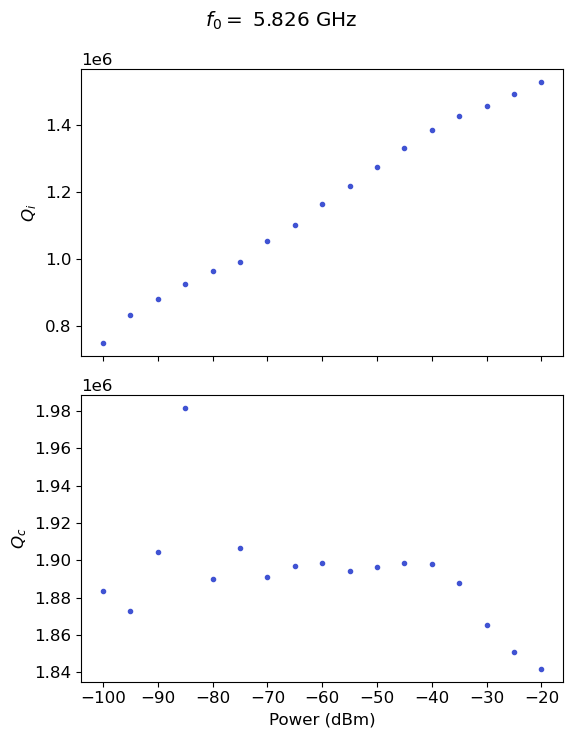

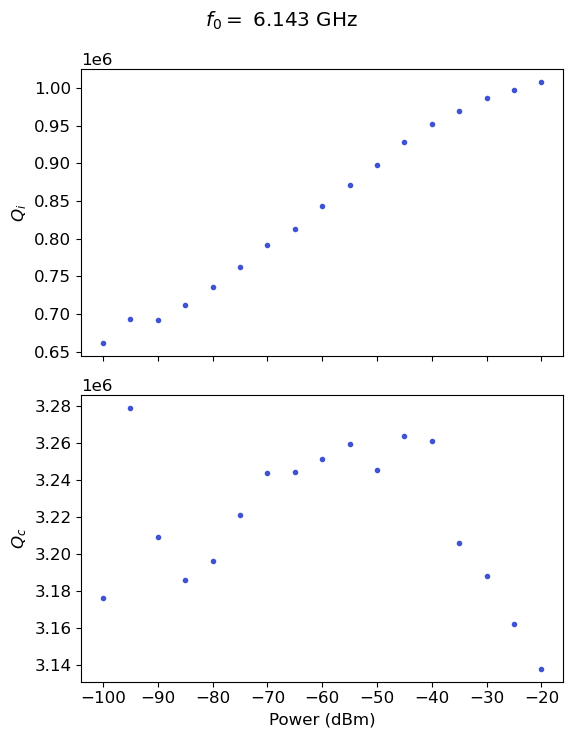

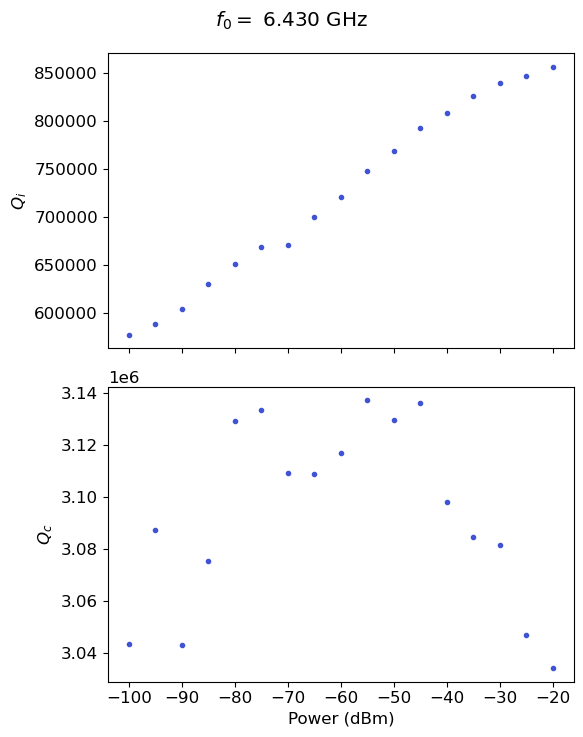

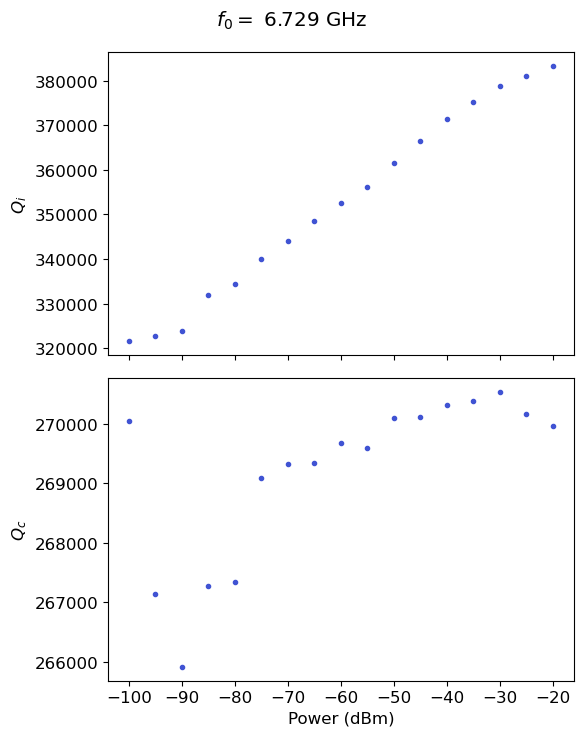

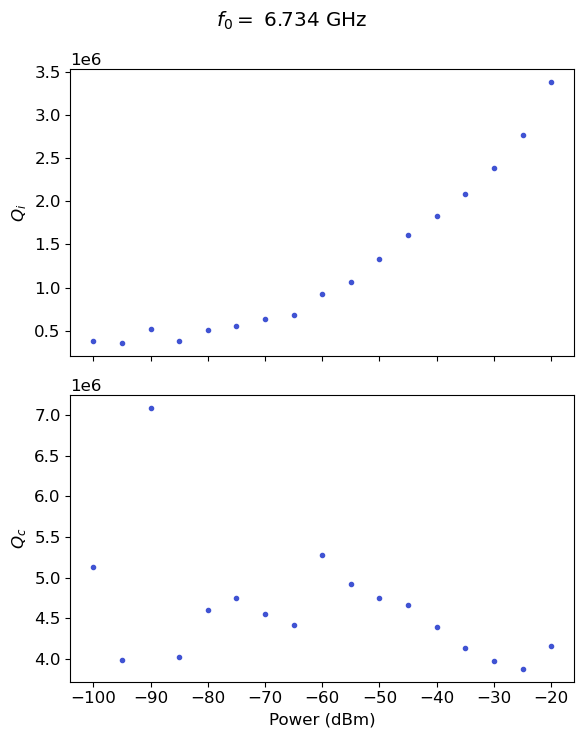

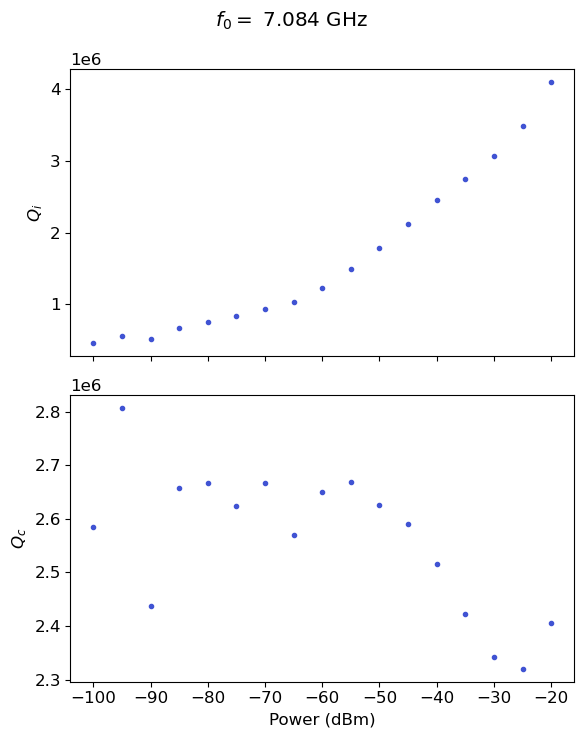

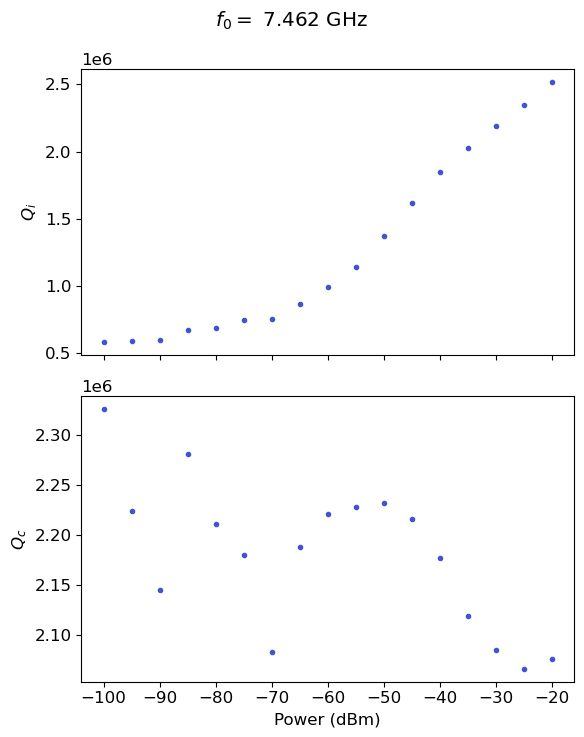

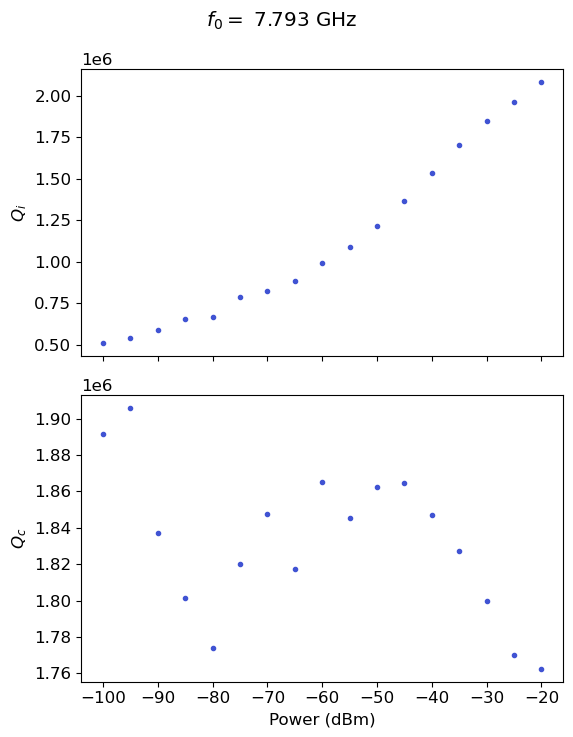

In [273]:
if sample=='no hf':
    pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/'
    directories = ['power_sweep7']
    res_params = ana_res.analyze_sweep_double(directories, pth)
elif sample == 'hf':
    pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240719/data/'
    directories = ['sample1_power_sweep_2']

    res_param = ana_res.analyze_sweep(directories, pth)
elif sample=='hf2':
    pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240729/data/'
    directories = ['power_sweep2']
    res_params = ana_res.analyze_sweep_double(directories, pth)
else:
    pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240729/data/'
    directories = ['power_sweep5']
    res_params = ana_res.analyze_sweep_triple(directories, pth, name=params['res_name'], plot=True)


Counter()
Counter()


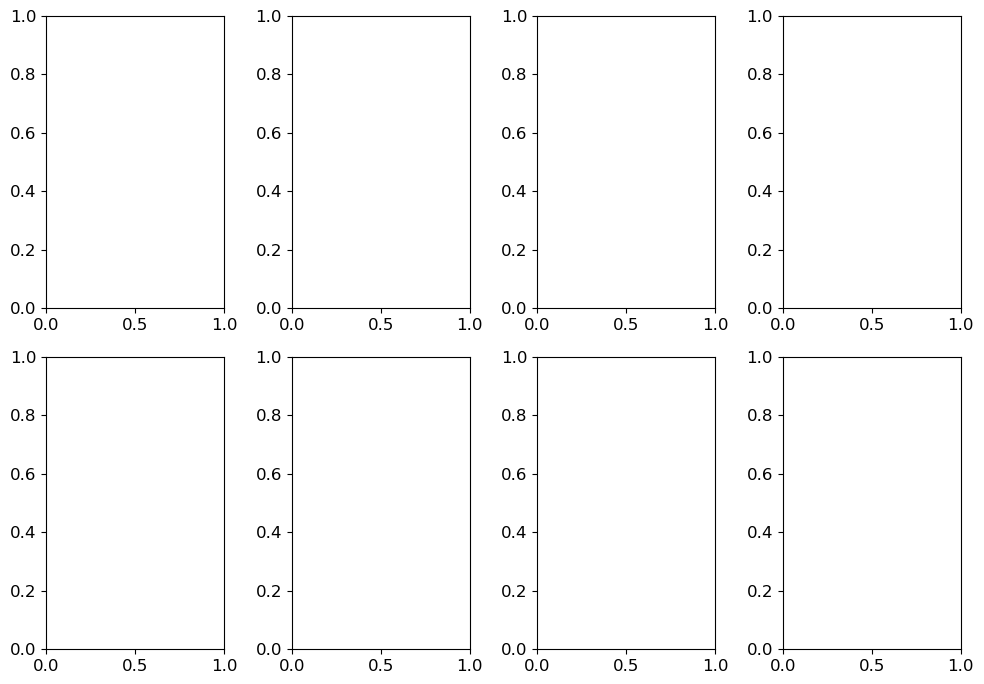

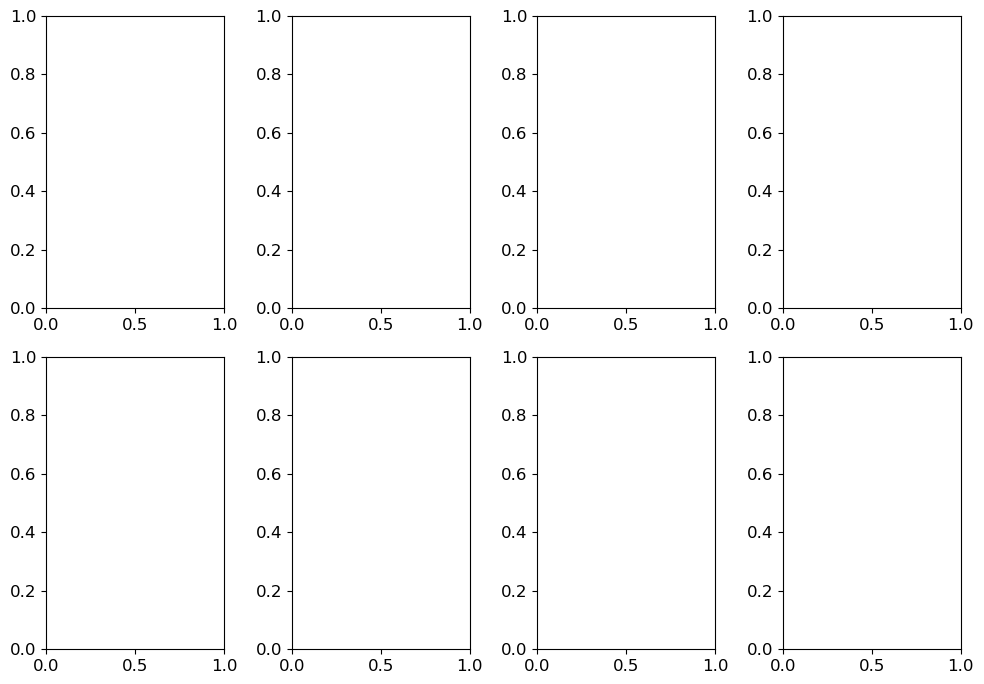

In [274]:
ana_res.plot_all(directories, pth, max_power=-25, norm=False)

#### Reorder the data based on pitch (only run once)

In [269]:
params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])


### Power sweep and TLS fits

Failed!


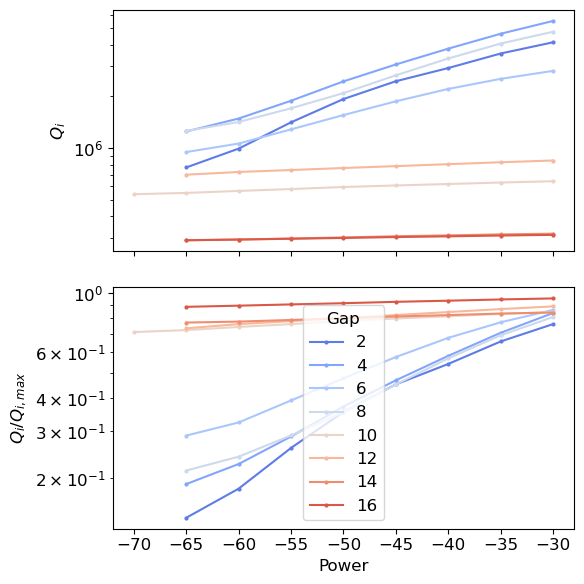

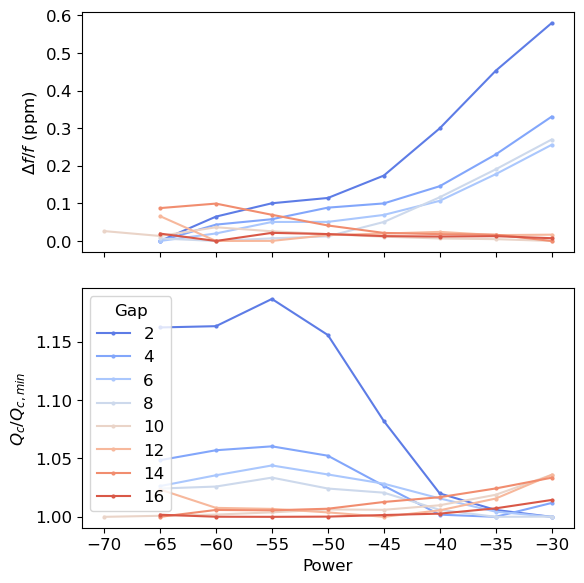

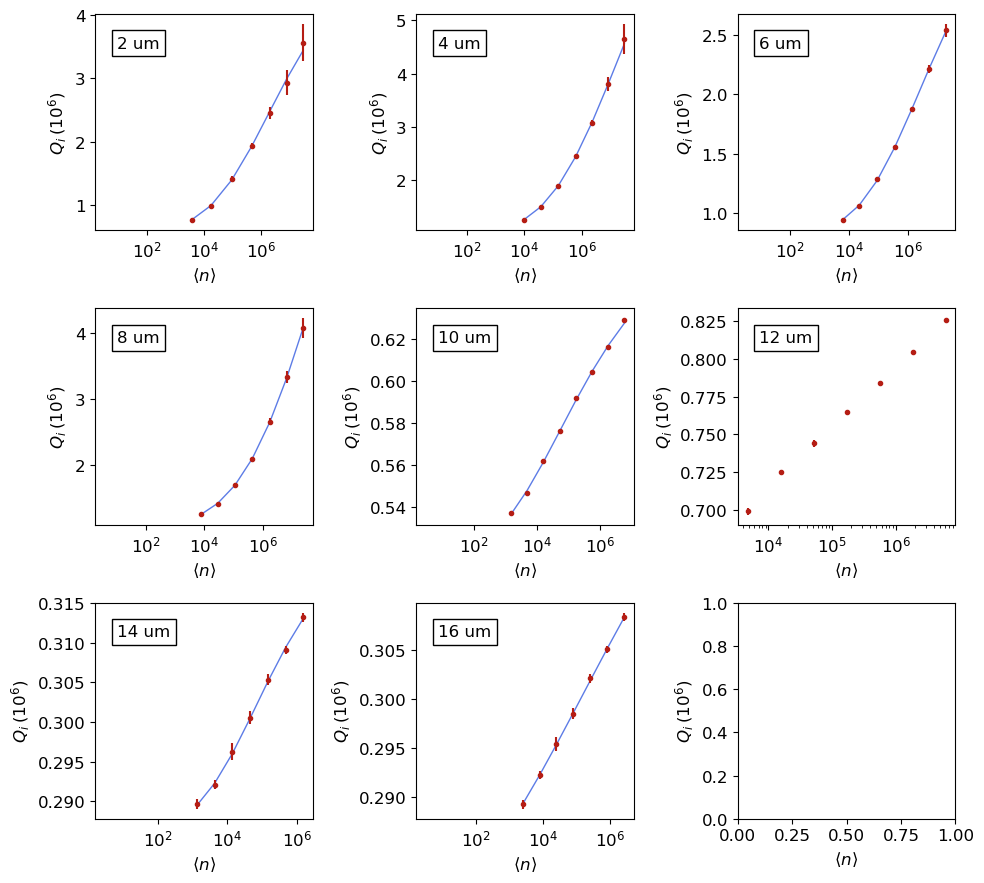

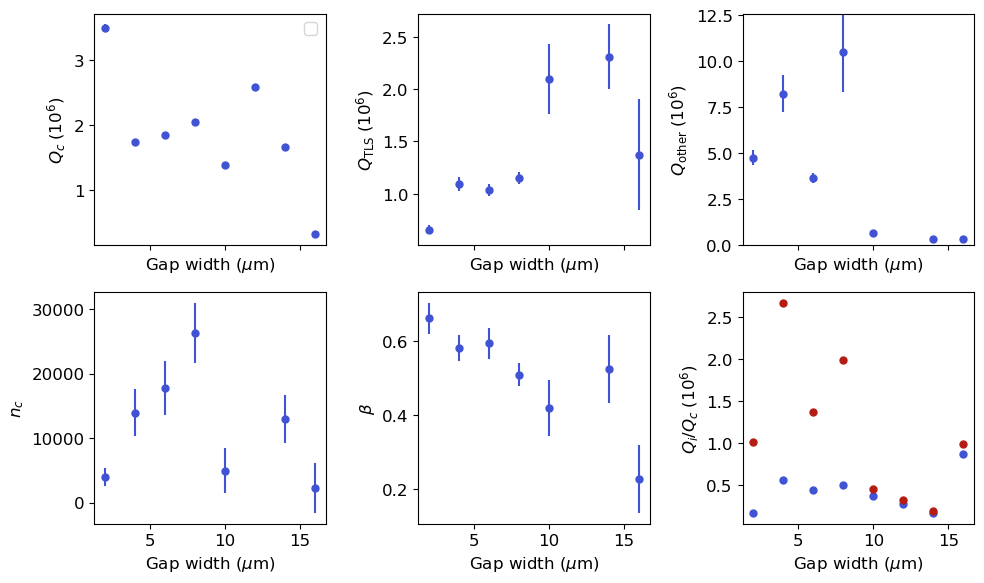

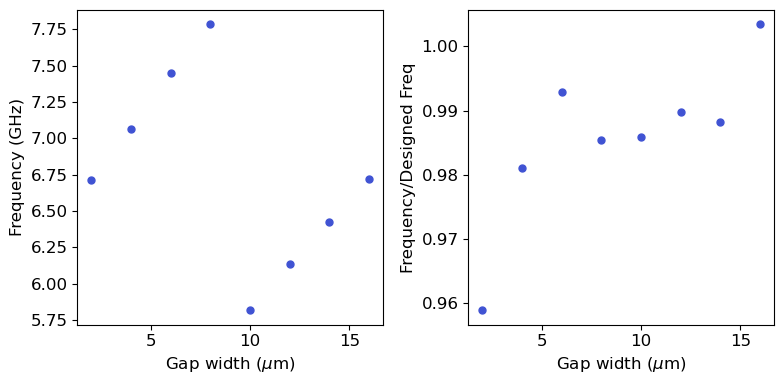

In [270]:
ana_res.plot_power(res_params, params, base_pth, use_pitch=True)
cfg = ana_tls.fit_qi(res_params, params, base_pth) 
ana_tls.plot_res_pars([params], [''],base_pth)
ana_res.plot_res_pars([params], [''], base_pth)

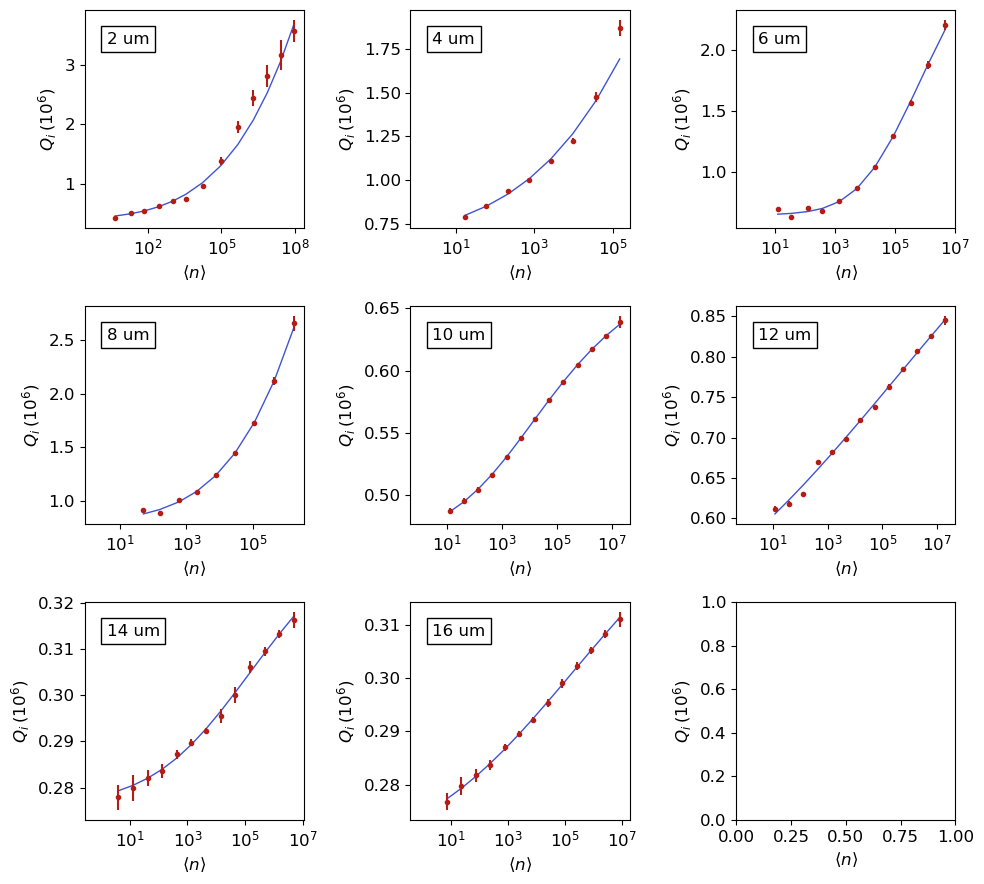

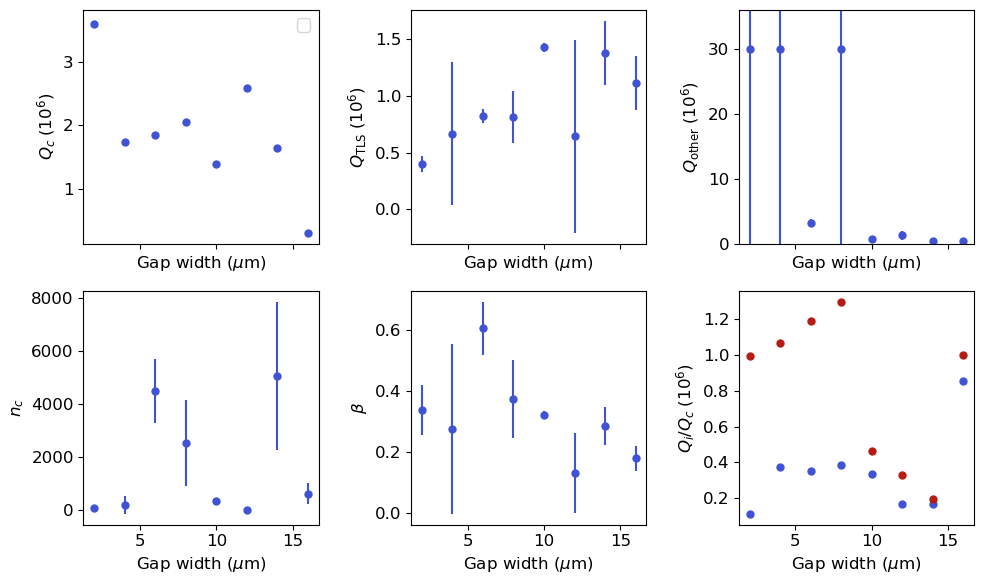

In [251]:
if sample == 'hf3':
    max_power = [-25, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, base_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],base_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, base_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],base_pth)
    params_no_hf = copy.deepcopy(params)


In [58]:
for i in range(len(params['freqs'])):
    print(params['freqs'][i]/params['qi0'][i])

for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    print(params['freqs'][i]/q)

12100.800985768958
7782.564098247494
13203.039908524339
8114.74706657984
12859.25267051862
20730.168043168378
23380.332860878578
23325.452131554466
13975.185464132746
11814.6336472454
17211.15853356598
11910.586125345526
17028.921729113386
23072.380600486416
27217.319288310588
44813.098707528305


In [59]:
1/(1+params['qc']/params['qi0'])

array([0.1341, 0.3413, 0.2329, 0.3187, 0.2449, 0.1015, 0.141 , 0.4795])

In [60]:
ana_tls.plot_res_pars([params_nohf_hi_pow, params_nohf_low_pow], ['-85','-105'],base_pth)

NameError: name 'params_nohf_hi_pow' is not defined

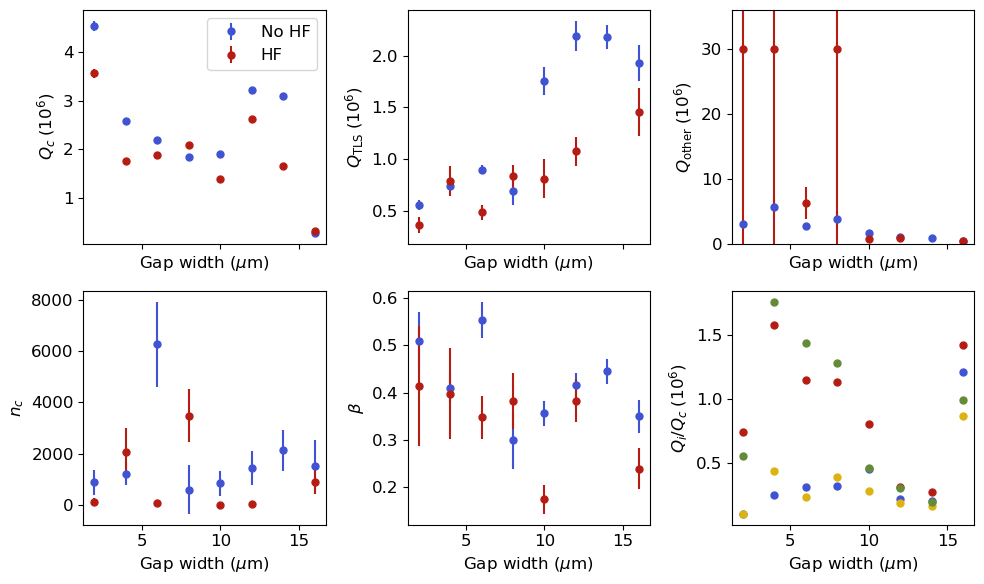

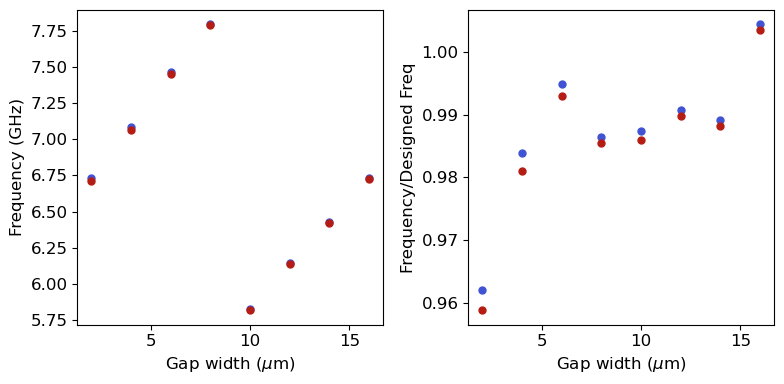

In [ ]:
#params_hf = copy.deepcopy(params)

ana_tls.plot_res_pars([params_no_hf, params_hf], ['No HF','HF'],base_pth)
ana_res.plot_res_pars([params_no_hf, params_hf], ['No HF','HF'],base_pth)


In [ ]:
params_no_hf['qtls0']

array([ 552364.0587,  739670.9167,  896237.2593,  692777.8324,
       1758586.6516, 2196302.5664, 2185073.5039, 1932055.9713])

In [ ]:
params

{'res_name': '240725',
 'atten': -50,
 'min_power': -105,
 'max_power': -15,
 'pitch': [2, 4, 6, 8, 10, 12, 14, 16],
 'target_freq': [7, 7.2, 7.5, 7.9, 5.9, 6.2, 6.5, 6.7],
 'temp': 0.04,
 'qc': array([0.0046, 0.0026, 0.0022, 0.0018, 0.0019, 0.0032, 0.0031, 0.0003]),
 'qc_err': array([108017.5265,  36768.8636,  17103.0382,  16333.8128,   6004.7452,
         11452.9786,  16689.9352,    425.4585]),
 'freqs': array([6.7345e+09, 7.0839e+09, 7.4620e+09, 7.7930e+09, 5.8260e+09,
        6.1428e+09, 6.4298e+09, 6.7292e+09]),
 'qtls0': array([ 372113.8508,  449772.6486,  768178.0502,  460666.6278,
        1196181.9834, 1762113.2479, 1744043.8255, 1556052.7482]),
 'qother': array([ 4987602.8393, 10000000.    ,  3182784.0873,  7608195.6334,
         1787050.1098,  1063956.8647,   896595.0296,   398468.9725]),
 'nc': array([  60.8977,   16.6254, 2416.3062,    9.0723,   28.165 ,  281.0099,
         407.3018,  234.2742]),
 'beta': array([0.3742, 0.3019, 0.461 , 0.2174, 0.2637, 0.3566, 0.3721, 0.2894

## Single resonators

In [ ]:
pattern0 = r'res_(\d+)_\d{2,3}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[j]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

In [ ]:

for i in range(len(file_list)):
    pth = pth_base       
    try:
        data = ana_res.grab_data(pth, file_list[i])       
        output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    except: 
        print('fit failed')  


In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, output_path, 'png')   
ana_res.plot_raw_data(data)

### Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,base_pth)